In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Abstract:

El presente dataset contiene información de distintos vuelos de distintas aerolíneas y aeropuertos en pro de encontrar la relación que tienen las distintas variables con el retraso de vuelos. Dicho retraso se refleja en la columna DEP_DEL15 en una variable binaria, donde 0 significa "sin retraso" y 1 "retraso de 15 minutos o más". Se pretende encontrar un buen predictor para dicha variable con los contenidos vistos durante el curso. 

El dataset nace con cierto nivel de postprocesamiento y no posee datos nulos. Sin embargo contiene un gran volumen de información, ie: 26 columnas y casi 6.5 millones de filas. 

# Hipótesis:

1.- Es posible predecir con cierto grado de exactitud el retardo de vuelos.

2.- Se espera qué:
    - Información con respecto al clima como nivel de nieve (columnas: SNOW, SNWD, PRCP, AWND, etc.) tiene gran influencia en el retraso de vuelos.
    - Gran utilización de dependencias y recursos humanos repercuten en los retrasos (ie: Número de vuelos durante el mes de aerolinea y/o aeropuerto, y vuelos concurrentes)
    - Exceptuando ciertos valores claves* los días de la semana y meses** no repercuten en gran manera en el retraso de vuelos. (* Domingos, ** Diciembre, particularmente fin de año)

3.- Se espera responder a las preguntas: 
    - ¿Desde qué nivel de exactitud puede considerarse un predictor para estos datos un "buen" predictor?
    - ¿Cuál es el mejor predictor basado en las herramientas aprendidas en este curso basándose en costo y eficiencia computacional?

# Desafío:

"Utilizar TODAS las filas del dataset"
    

# Lectura de dataset

In [6]:
df = pd.read_csv(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.csv")
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


En un Lenovo Legion 5 Pro 16 (año 2019) con procesador AMD Ryzen 7 5800H con Radeon Graphics 3.20 GHz y RAM 16 GB la lectura del archivo .csv toma entre 13 y 16 segundos aproximadamente.

In [5]:
print(f'Memoria utilizada por el dataframe df = {df.memory_usage(deep=True).sum() / 1024**3} [GB]')

Memoria utilizada por el dataframe df = 2.8864462170749903 [GB]


In [6]:
df.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

El dataframe resultante de la lectura utiliza una cantidad de memoria alta. Basado en los dtypese, se sospecha que esta situación es mejorable.

# Otros "stats" del dataset

In [7]:
df.shape

(6489062, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

Las columnas de tipo entero acusan la ausencia de nulas en estas.

In [9]:
df.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

Ninguna columna contiene datos nulos

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,6489062.0,6.607062e+00,3.396853e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
DAY_OF_WEEK,6489062.0,3.935598e+00,1.995200e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DEL15,6489062.0,1.891441e-01,3.916231e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,6489062.0,3.821102e+00,2.382233e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,6489062.0,3.046890e+00,1.757864e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,6489062.0,2.783675e+01,2.151060e+01,1.000000,1.100000e+01,2.300000e+01,3.900000e+01,1.090000e+02
NUMBER_OF_SEATS,6489062.0,1.337397e+02,4.645213e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
AIRPORT_FLIGHTS_MONTH,6489062.0,1.268458e+04,8.839796e+03,1100.000000,5.345000e+03,1.156200e+04,1.761500e+04,3.525600e+04
AIRLINE_FLIGHTS_MONTH,6489062.0,6.296058e+04,3.438223e+04,5582.000000,2.503400e+04,7.087800e+04,8.631200e+04,1.177280e+05
AIRLINE_AIRPORT_FLIGHTS_MONTH,6489062.0,3.459251e+03,4.251139e+03,1.000000,6.540000e+02,2.251000e+03,4.806000e+03,2.183700e+04


¿Es posible llevar las columnas tipo object (string-like values) a pandas.category?

In [11]:
for feature in df.select_dtypes('object').columns:
    print(f'Valores únicos para {feature}: {len(df[feature].unique())}')

Valores únicos para DEP_TIME_BLK: 19
Valores únicos para CARRIER_NAME: 17
Valores únicos para DEPARTING_AIRPORT: 96
Valores únicos para PREVIOUS_AIRPORT: 356


356 valores únicos para "PREVIOUS_AIRPORT" es la máxima longitud de valores únicos para las columnas basadas en string. Este número no representa ni un 1% del total de filas del dataframe, por lo que desde una perspectiva de ahorro de uso de memoria es válido llevar estas columnas al dtype pandas.Category.

In [12]:
print(f'''Memoria utilizada por el dataset con sus columnas categóricas como pandas.Category = {
    df
    .astype(
        dict(zip(
            df.select_dtypes('object'), 
            len(df.select_dtypes('object')) * ['category']))
    )
    .memory_usage(deep=True).sum() / 1024**3} [GB]'''
)

Memoria utilizada por el dataset con sus columnas categóricas como pandas.Category = 1.0939036458730698 [GB]


El uso de memoria se ha reducido más de un 50%. Es lógico continuar con las columnas de valores enteros. Dichas columnas están en int64, y bien podrían estar como int8

In [13]:
for feature in df.select_dtypes('integer').columns:
    print(f'(Valor mínimo, Valor máximo) de {feature} = ({df[feature].min()}, {df[feature].max()})')

(Valor mínimo, Valor máximo) de MONTH = (1, 12)
(Valor mínimo, Valor máximo) de DAY_OF_WEEK = (1, 7)
(Valor mínimo, Valor máximo) de DEP_DEL15 = (0, 1)
(Valor mínimo, Valor máximo) de DISTANCE_GROUP = (1, 11)
(Valor mínimo, Valor máximo) de SEGMENT_NUMBER = (1, 15)
(Valor mínimo, Valor máximo) de CONCURRENT_FLIGHTS = (1, 109)
(Valor mínimo, Valor máximo) de NUMBER_OF_SEATS = (44, 337)
(Valor mínimo, Valor máximo) de AIRPORT_FLIGHTS_MONTH = (1100, 35256)
(Valor mínimo, Valor máximo) de AIRLINE_FLIGHTS_MONTH = (5582, 117728)
(Valor mínimo, Valor máximo) de AIRLINE_AIRPORT_FLIGHTS_MONTH = (1, 21837)
(Valor mínimo, Valor máximo) de AVG_MONTHLY_PASS_AIRPORT = (70476, 4365661)
(Valor mínimo, Valor máximo) de AVG_MONTHLY_PASS_AIRLINE = (473794, 13382999)
(Valor mínimo, Valor máximo) de PLANE_AGE = (0, 32)


No existen valore negativos, por lo que se optará por "uint"s, enteros sin signo para el tipo de datos. Notar que para la variable objetivo ("DEP_DEL15") se usa el tipo de datos booleano.

In [14]:
# Uso de conjuntos para explotar su aritmética

bool_set  = set(['DEP_DEL15'])
int8_set  = set()
int16_set = set()
int32_set = set()

for feature in df.select_dtypes('integer').columns:
    if   df[feature].max() <= np.iinfo('uint8').max:
        int8_set.add(feature)
    elif df[feature].max() <= np.iinfo('uint16').max:
        int16_set.add(feature)
    elif df[feature].max() <= np.iinfo('uint32').max:
        int32_set.add(feature)
    else:
        continue

int8_set = int8_set - bool_set

new_dtypes = (
    {'DEP_DEL15' : 'bool'} |
    dict(zip(int8_set,  len(int8_set) * ['uint8'])) | 
    dict(zip(int16_set, len(int16_set) * ['uint16'])) | 
    dict(zip(int32_set, len(int32_set) * ['uint32'])) |
    dict(zip(df.select_dtypes('object').columns, len(df.select_dtypes('object').columns) * ['category']))
)
new_dtypes

{'DEP_DEL15': 'bool',
 'SEGMENT_NUMBER': 'uint8',
 'MONTH': 'uint8',
 'PLANE_AGE': 'uint8',
 'DISTANCE_GROUP': 'uint8',
 'DAY_OF_WEEK': 'uint8',
 'CONCURRENT_FLIGHTS': 'uint8',
 'AIRPORT_FLIGHTS_MONTH': 'uint16',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH': 'uint16',
 'NUMBER_OF_SEATS': 'uint16',
 'AVG_MONTHLY_PASS_AIRPORT': 'uint32',
 'AVG_MONTHLY_PASS_AIRLINE': 'uint32',
 'AIRLINE_FLIGHTS_MONTH': 'uint32',
 'DEP_TIME_BLK': 'category',
 'CARRIER_NAME': 'category',
 'DEPARTING_AIRPORT': 'category',
 'PREVIOUS_AIRPORT': 'category'}

In [15]:
print('Memoria utilizada luego de transformar [MB]:')
result = ( 
    df
    .astype(new_dtypes)
    .memory_usage(deep=True)
    .sum()
) / 1024**2
print(result)
print(f'Lo que representa un {100 * round(result/(df.memory_usage(deep=True).sum()/1024**2), 3)}% del tamaño original')

df = ( 
    df
    .astype(new_dtypes)
)
df.to_parquet(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.parquet", engine = "pyarrow")


Memoria utilizada luego de transformar [MB]:
631.2696437835693
Lo que representa un 21.4% del tamaño original


In [7]:
import os

df = pd.read_parquet(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.csv")
befor_trans_RAM = round(df.memory_usage(deep = True).sum() / 1024**2, 2)
df = pd.read_parquet(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.parquet")
after_trans_RAM = round(df.memory_usage(deep = True).sum() / 1024**2, 2)

befor_trans_HDD = round(os.path.getsize(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.csv")     / 1024 ** 2, 2)
after_trans_HDD = round(os.path.getsize(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.parquet") / 1024 ** 2, 2)

[Text(0, 0, '\n1303.99 MB'), Text(0, 0, '\n47.27 MB')]

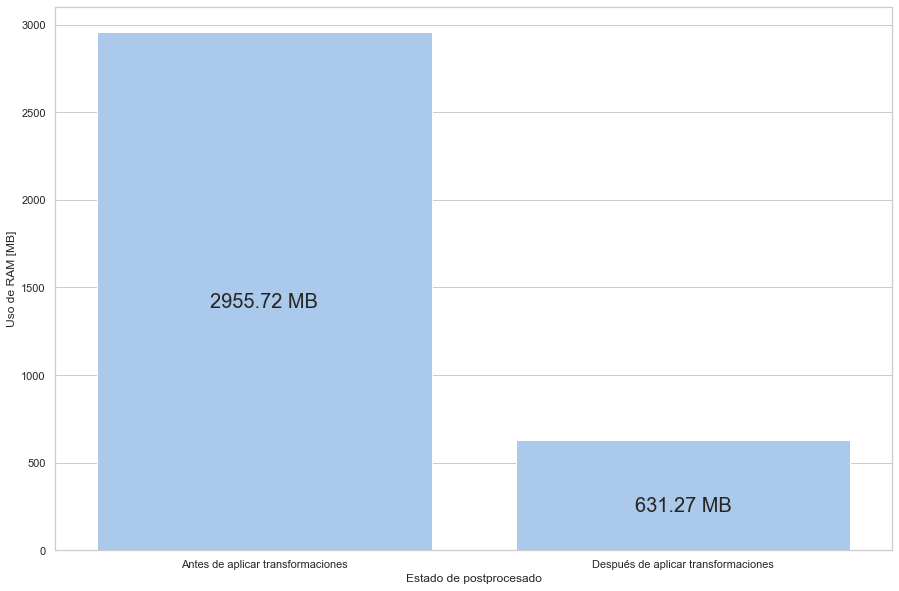

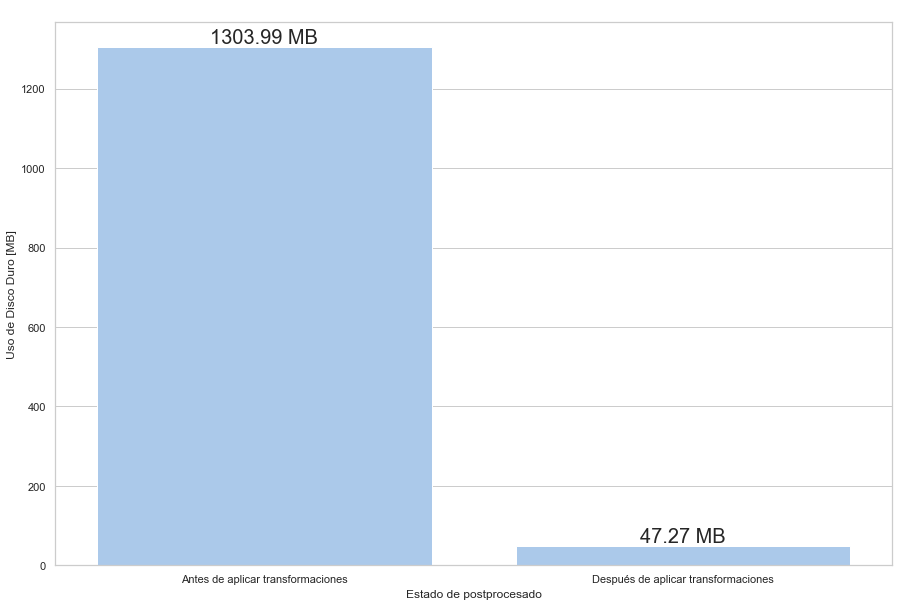

In [34]:
memory_usage_df = pd.DataFrame({
    'RAM' : [befor_trans_RAM, after_trans_RAM],
    'HDD' : [befor_trans_HDD, after_trans_HDD],
    'Label' : ['Antes de aplicar transformaciones', 'Después de aplicar transformaciones']
})


import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="whitegrid", palette="pastel")

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Label', y = 'RAM', data=memory_usage_df,
            label="Total", color="b")
ax.set(ylabel="Uso de RAM [MB]",
       xlabel="Estado de postprocesado")
ax.bar_label(ax.containers[-1], fmt='\n%.2f MB', label_type='center', fontsize = 20)

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Label', y = 'HDD', data=memory_usage_df,
            label="Total", color="b")
ax.set(ylabel="Uso de Disco Duro [MB]",
       xlabel="Estado de postprocesado")
ax.bar_label(ax.containers[-1], fmt='\n%.2f MB', label_type='edge', fontsize = 20)



# Relectura con archivo parquet

In [2]:
df = pd.read_parquet(r"C:\Users\renef\Downloads\aa\full_data_flightdelay.parquet")

Lectura toma menos de 1 segundo en misma máquina

<AxesSubplot:title={'center':'Variable Objetivo'}, xlabel='DEP_DEL15'>

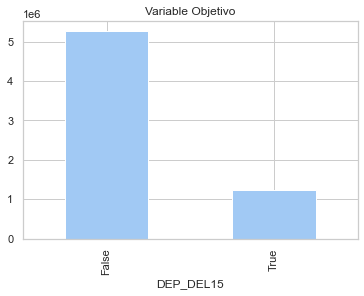

In [36]:
df.DEP_DEL15.value_counts().plot.bar(title = 'Variable Objetivo')

La variable objetivo presenta un desbalance, pero la cantidad de datos para ambos casos parecen ser suficientes (más de 1 millón de datos para cada valor de verdad)

## Análisis Exploratorio Gráfico



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", palette="pastel")

<AxesSubplot:>

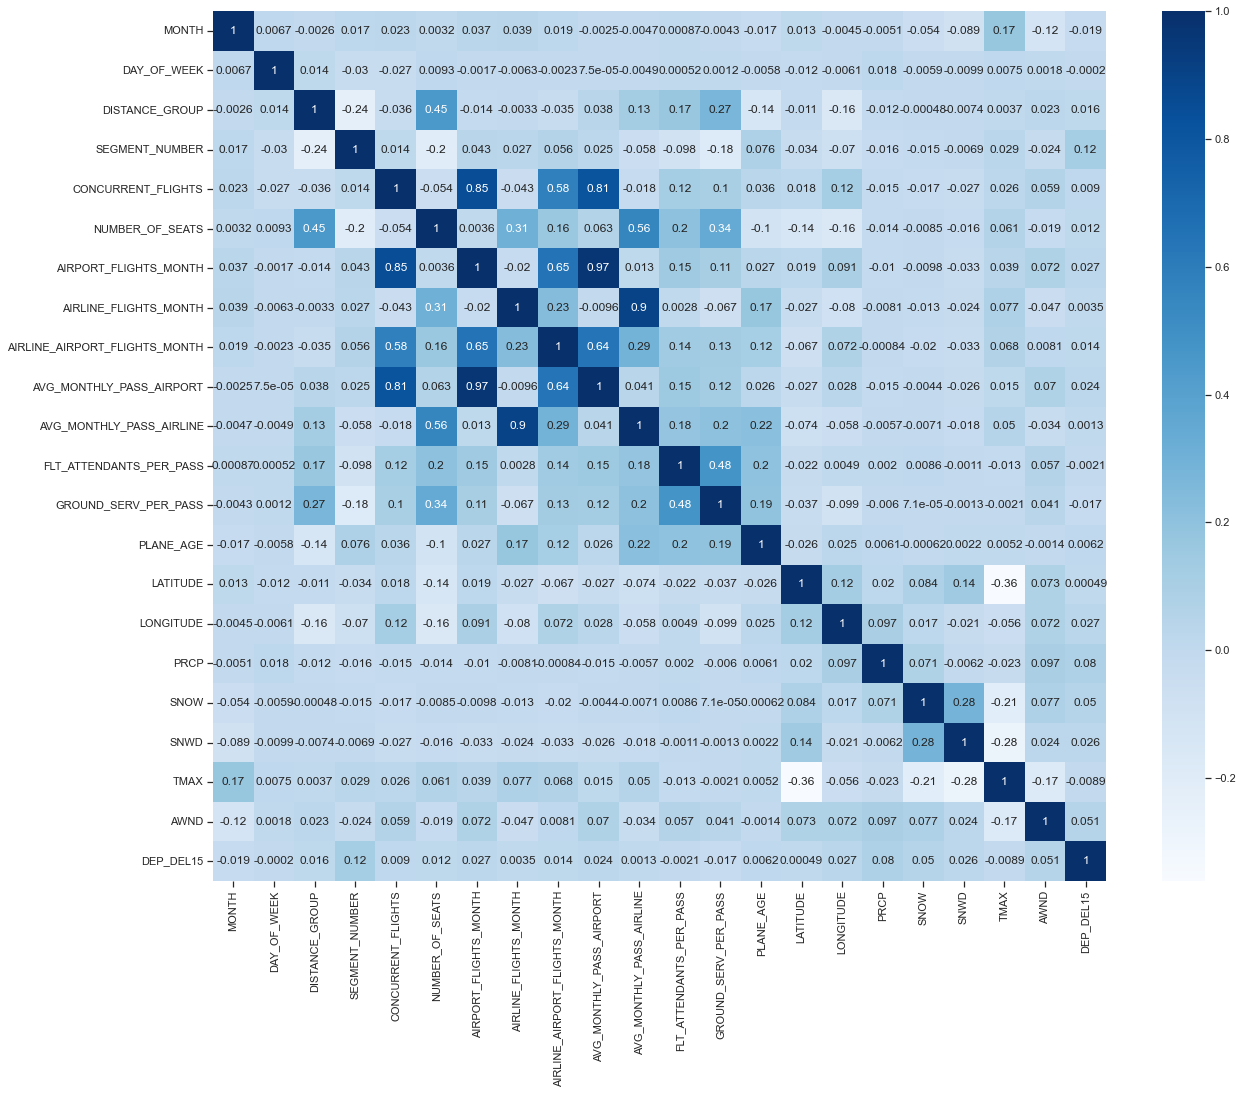

In [8]:
plt.figure(figsize = (20, 16))
sns.heatmap((df.select_dtypes('number').join(df.select_dtypes('bool'))).corr(), cmap = 'Blues', annot = True)

# Correlación:

Observamos que ninguna variable está especialemente correlacionada entre sí, con 2 pares de excepciones:

- AVG_MONTHLY_PASS_AIRPORT (Promedio mensual de pasajeros del aeropuerto) V/S AIRPORT_FLIGHTS_MONTHS (Promedio de vuelos por aeropuerto). La correlación resulta necesaria, puesto que a mayor número de vuelos mayor el número de pasajeros. La correlación es fuerte, 97%, lo que sugiere que una de estas variables debe desaparecer del modelo para establecer el algoritmo predictor basado en machine learning.

- AVG_MONTHLY_PASS_AIRLINE (Promedio mensual de pasajeros de la aerolínea) V/S AIRLINE_FLIGHTS_MONTHS (Promedio de vuelos por aerolínea). Misma lógica anterior pero con las aerolíneas.

Existen más correlaciones elevadas, en los rangos de 80 a 85%.

Más destacable es la absoluta carencia de correlación entre la variable objetivo DEP_DEL15 y el resto de variables, donde la más alta de todas es SEGMENT_NUMBER con 12%

# Comportamiento de variables por cada día de la semana

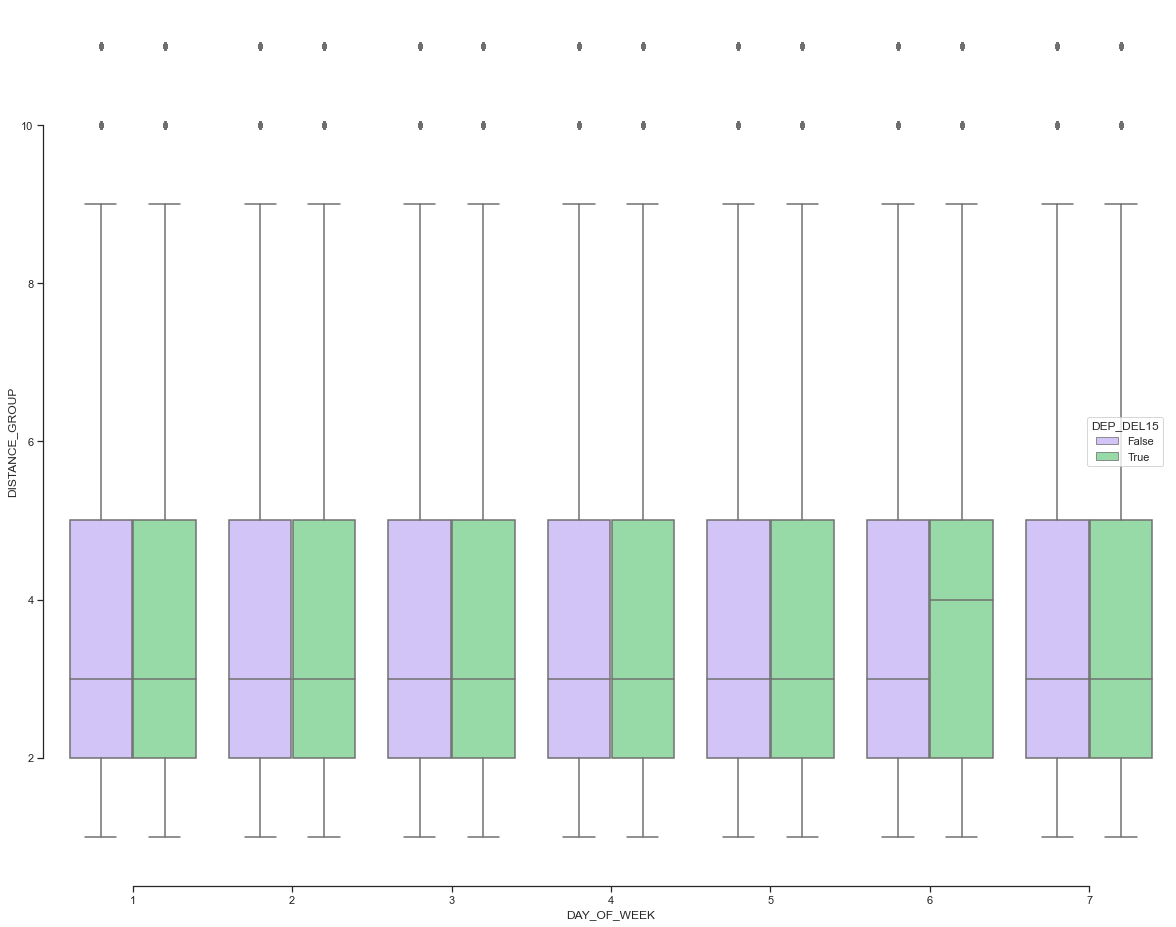

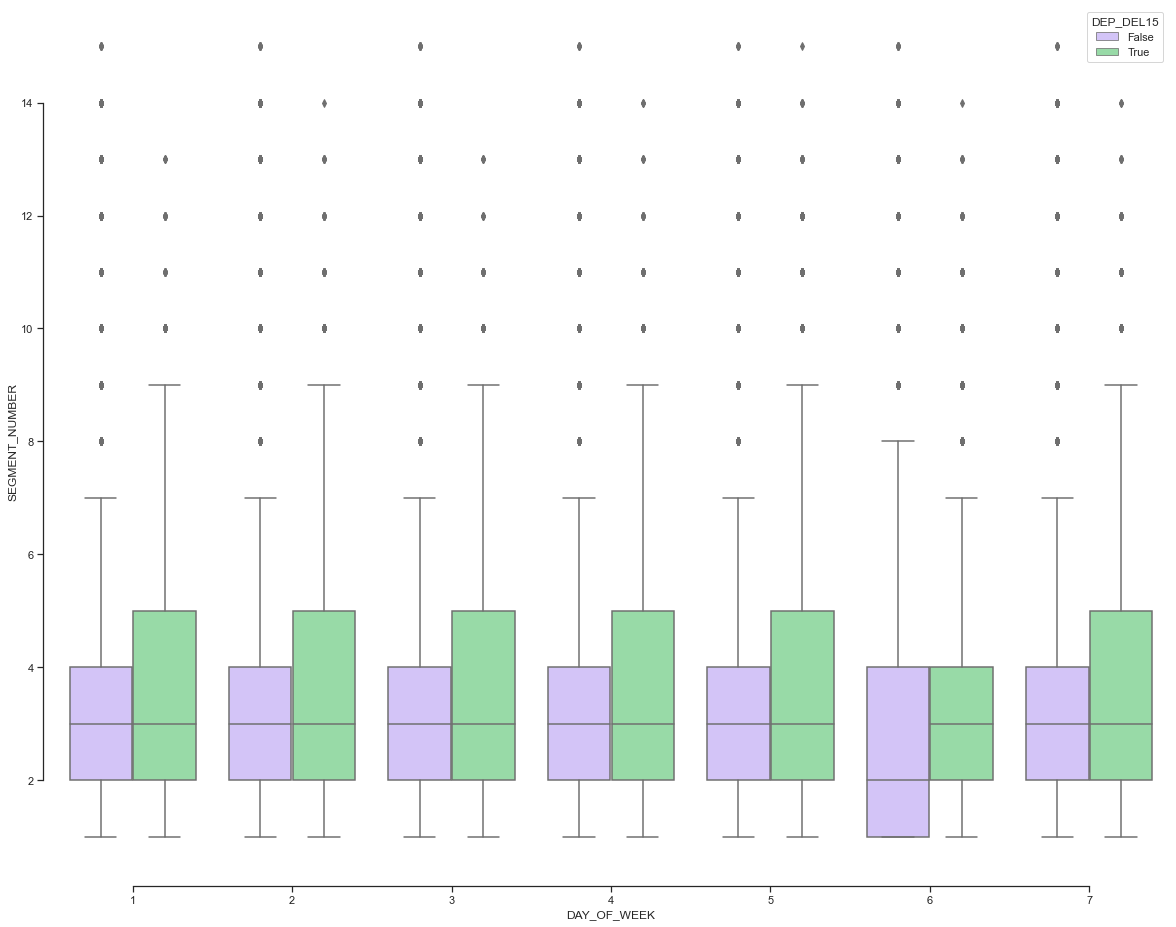

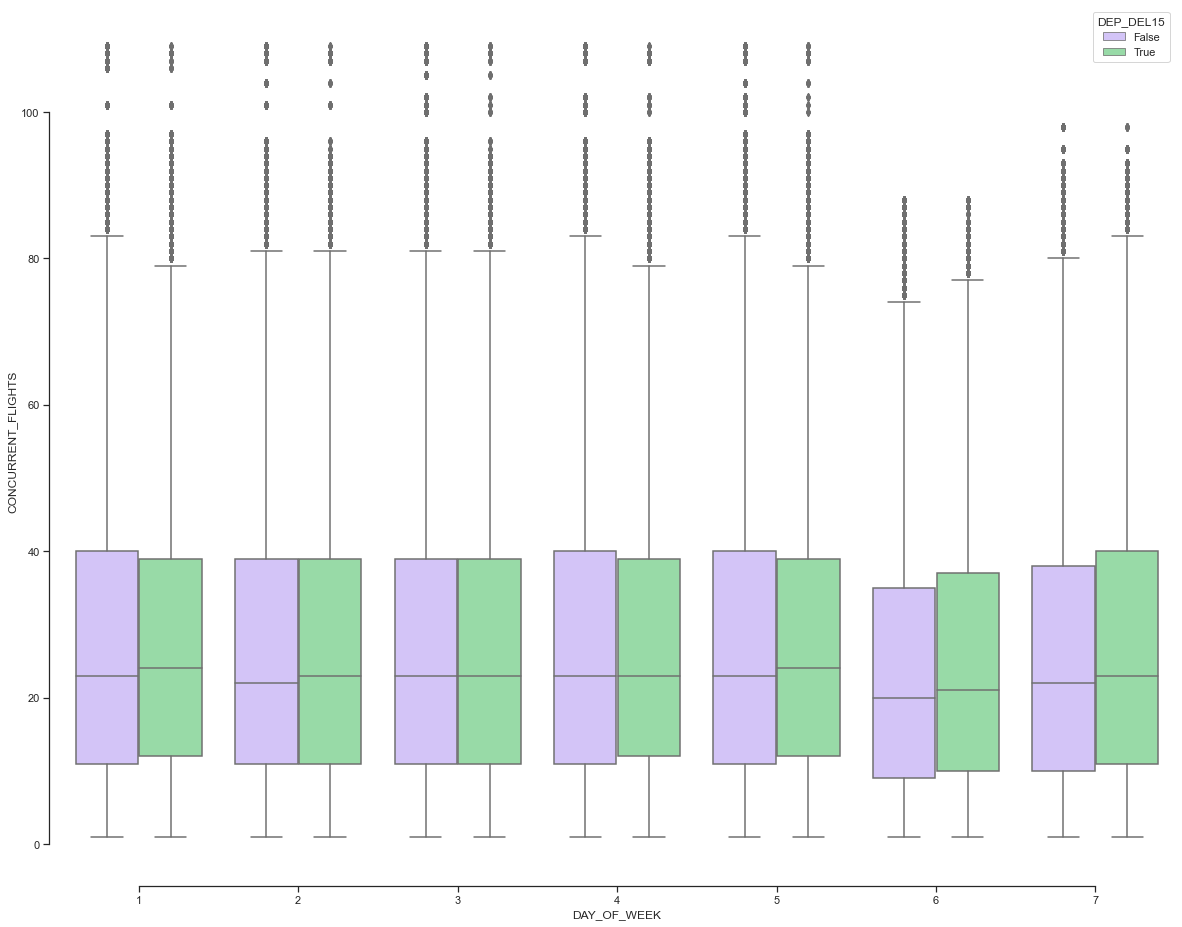

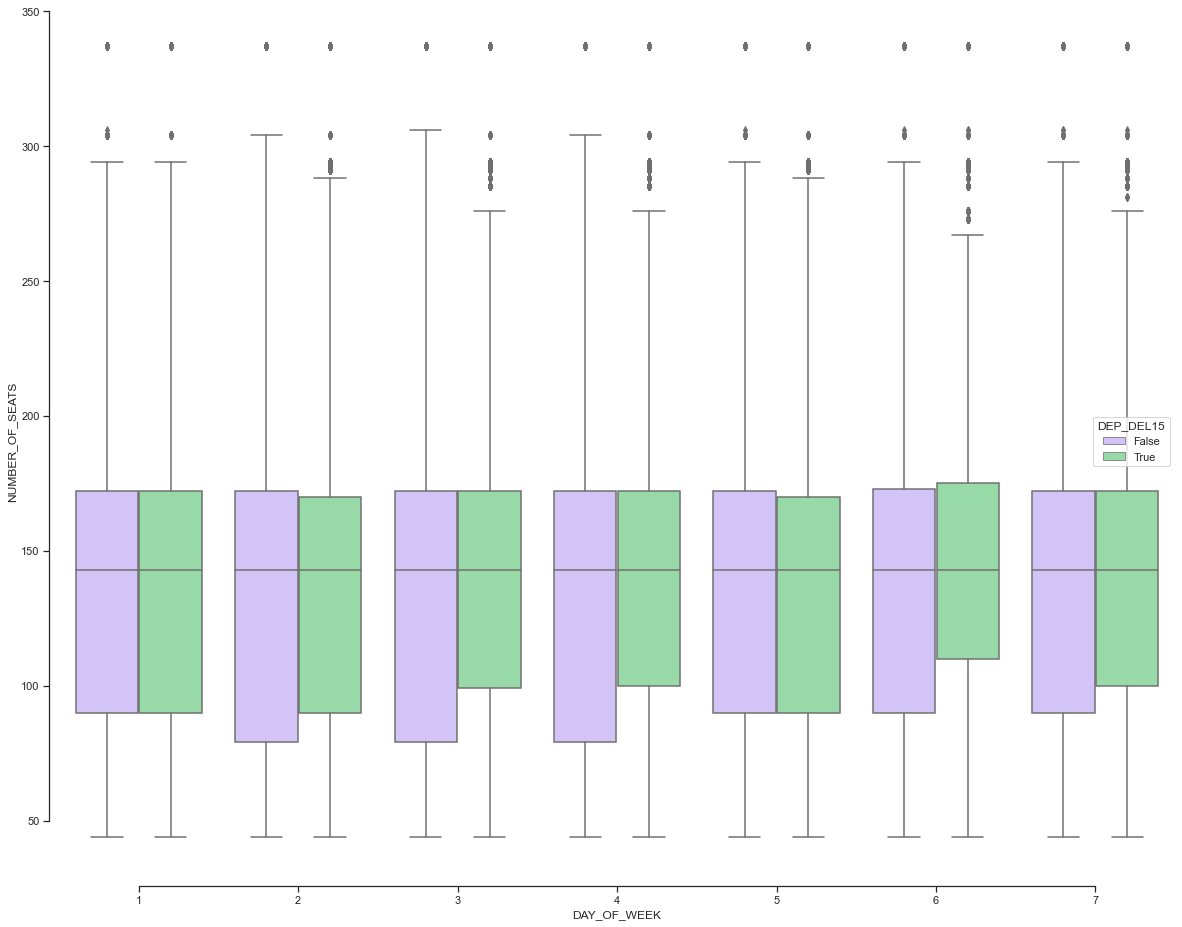

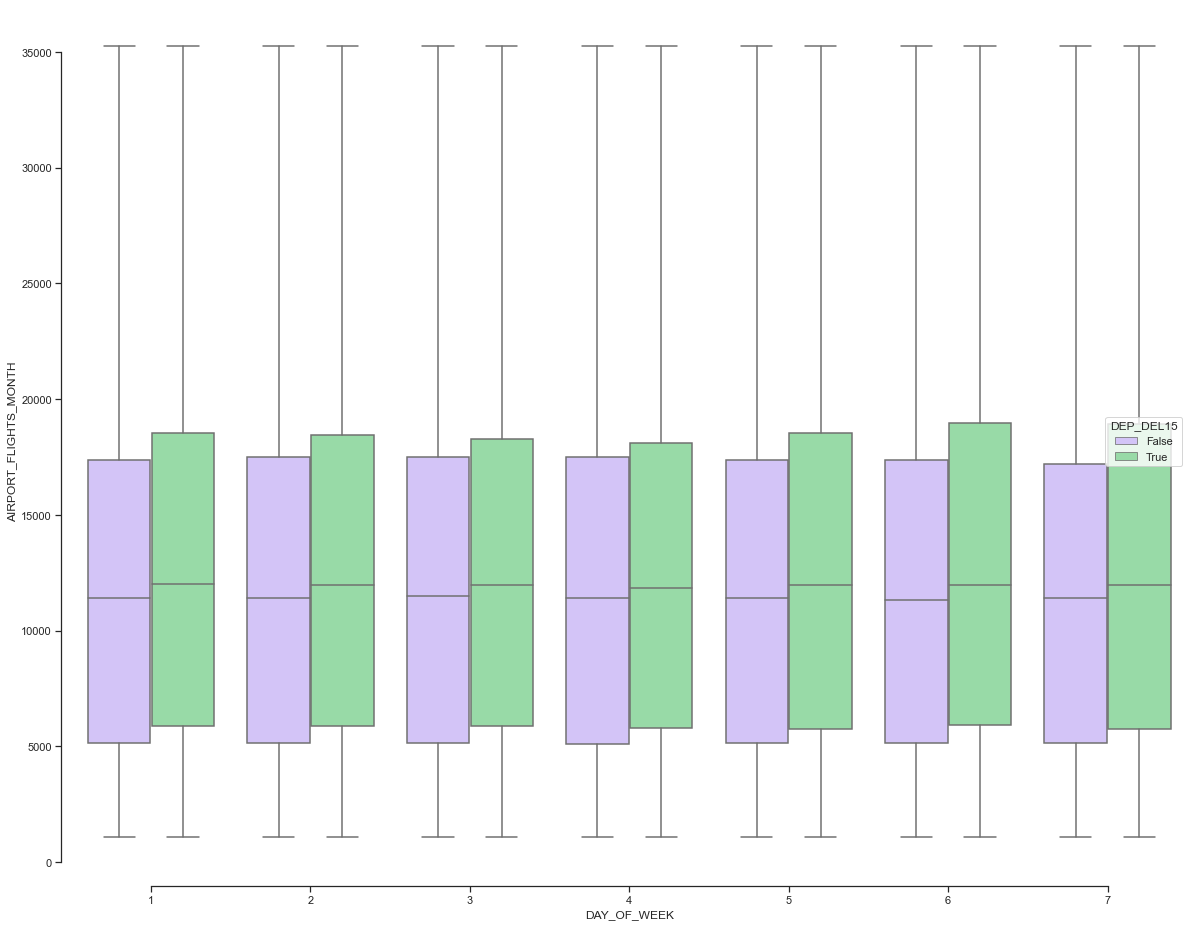

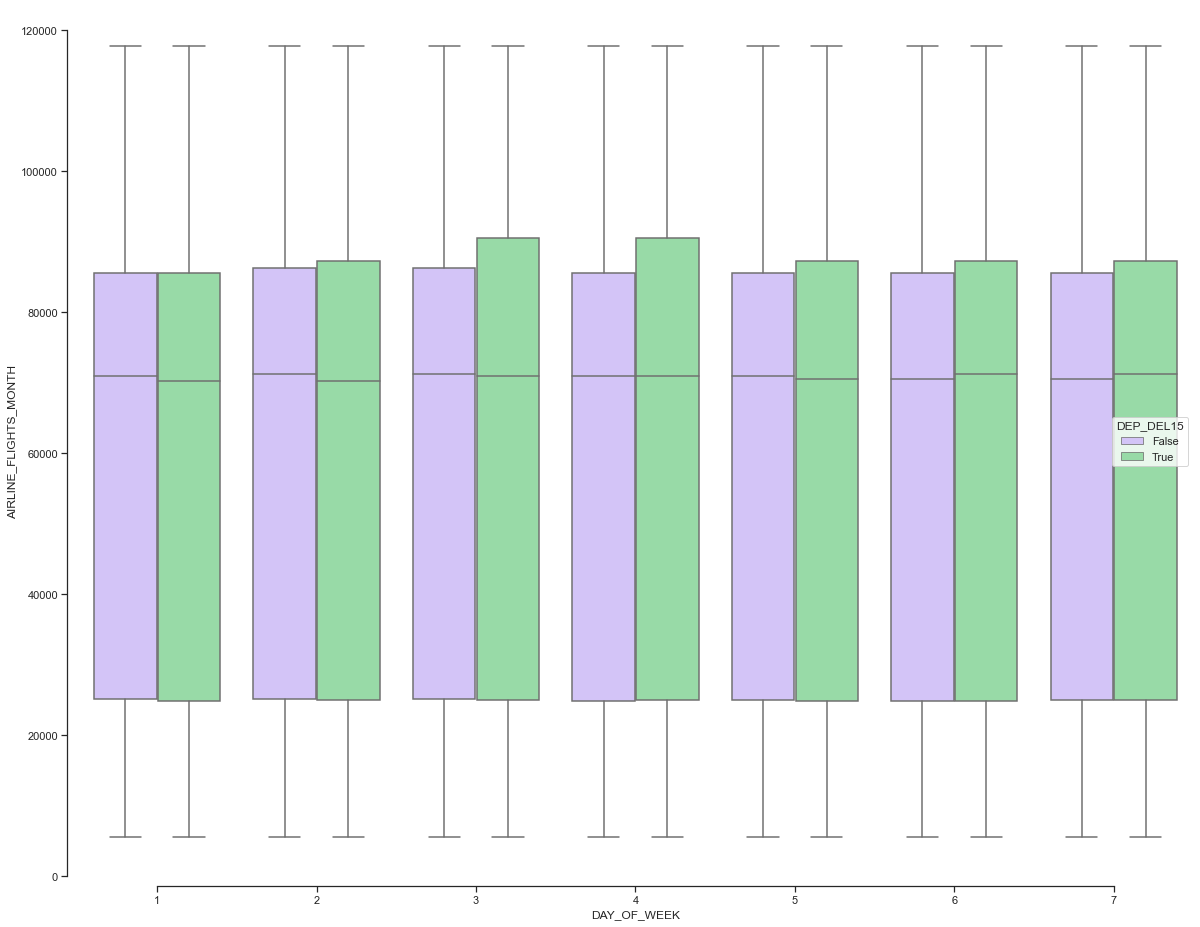

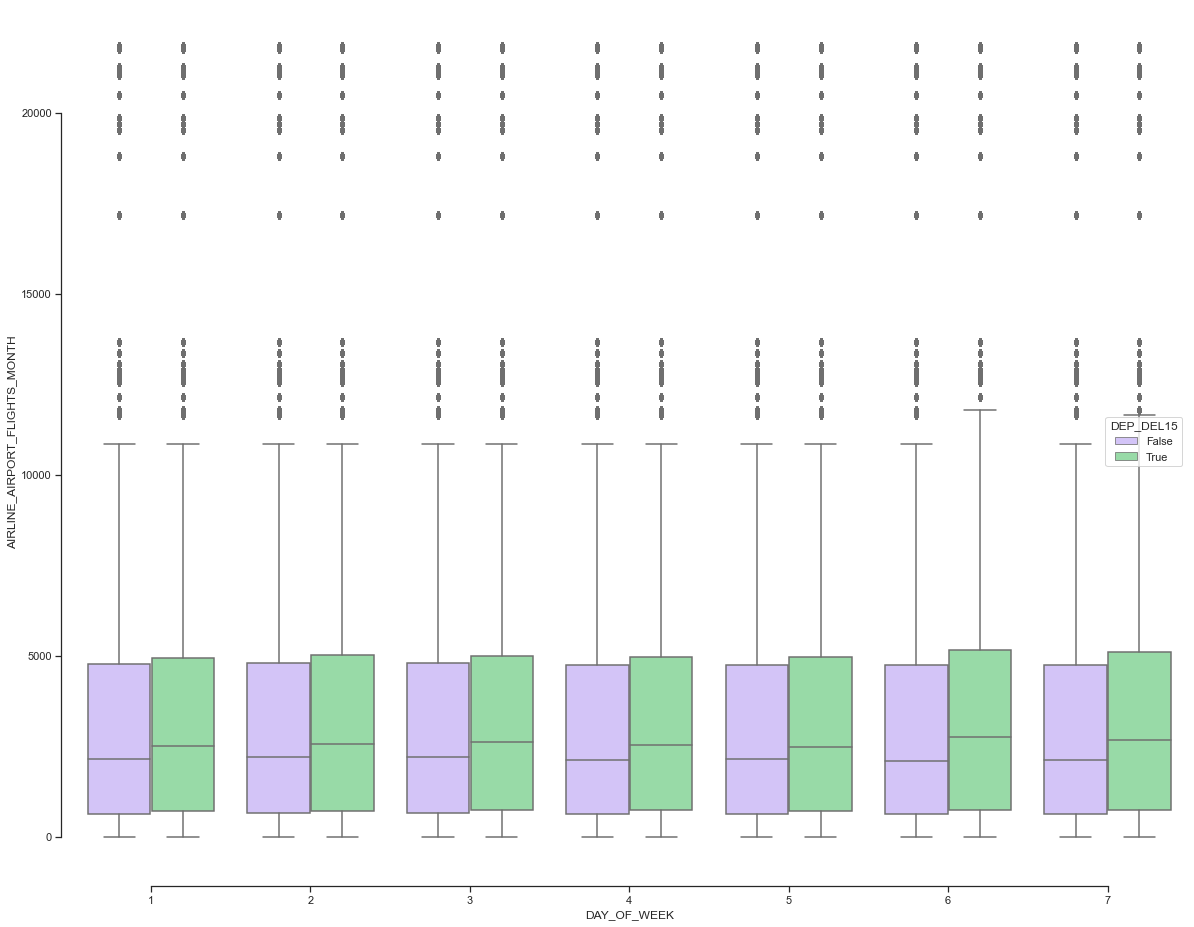

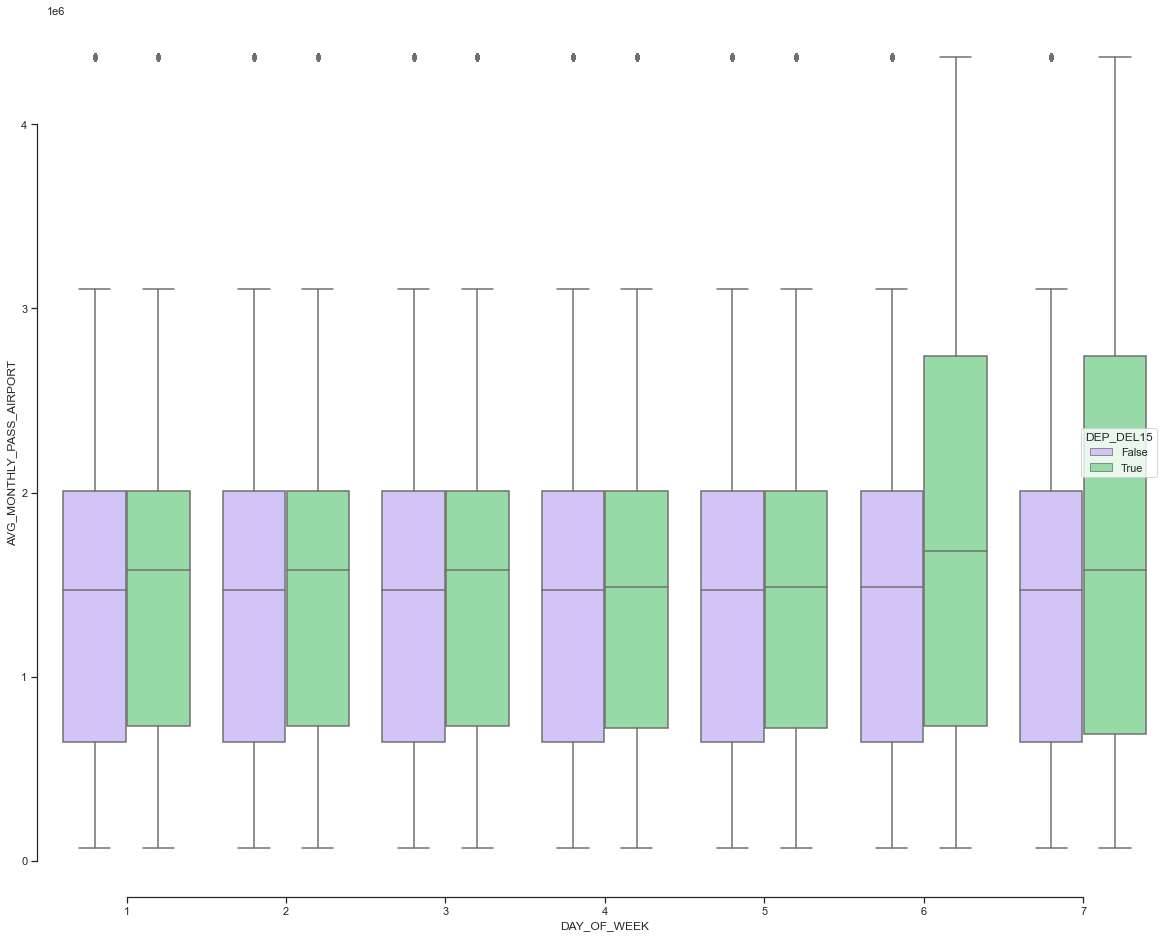

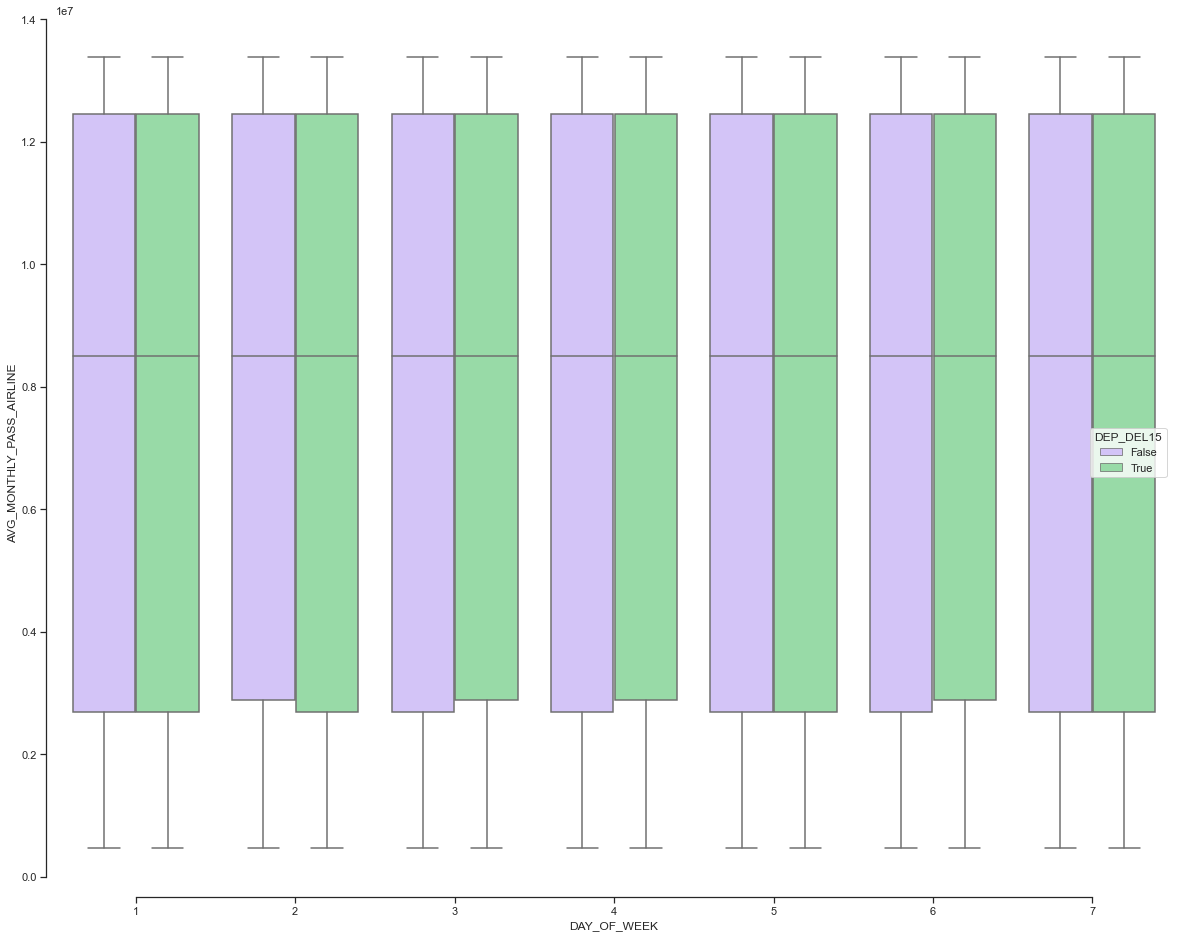

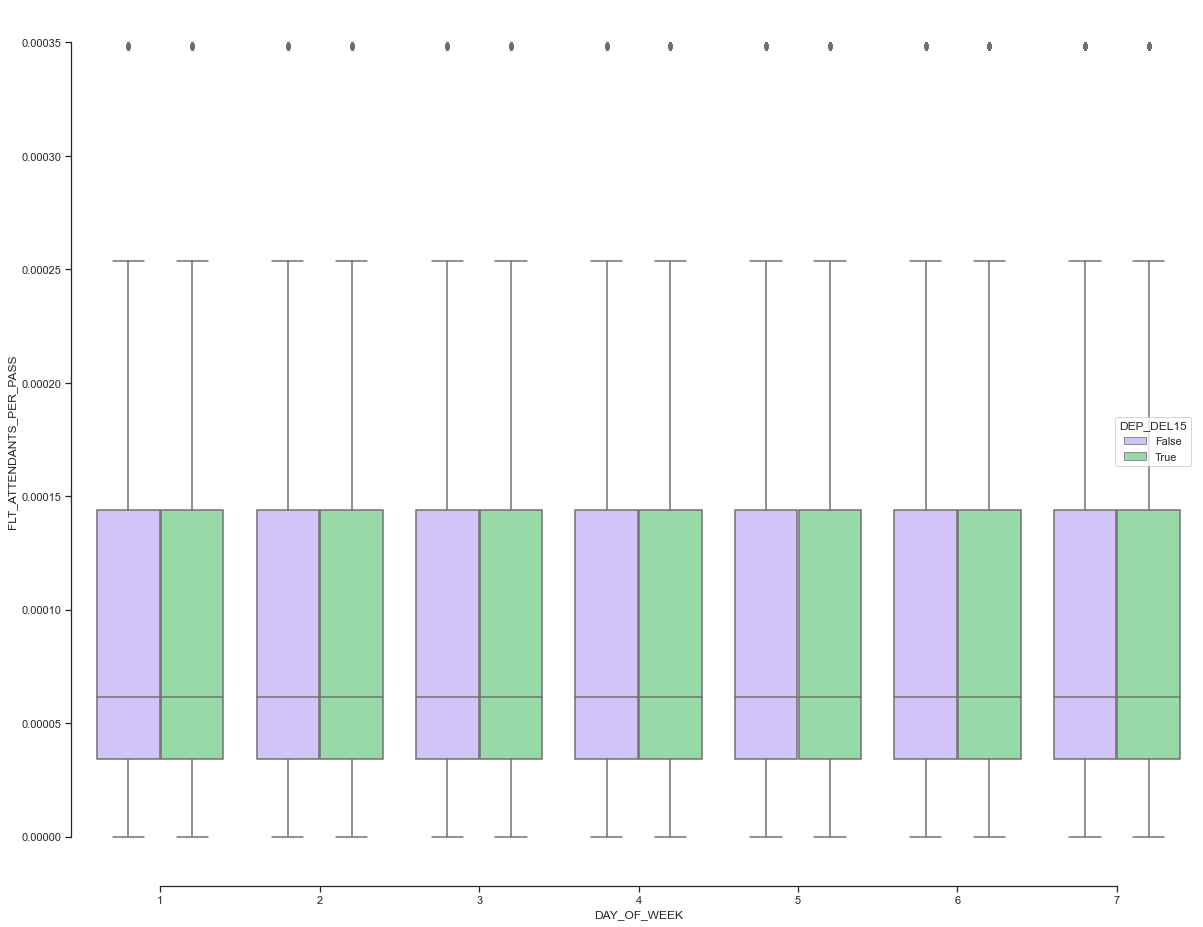

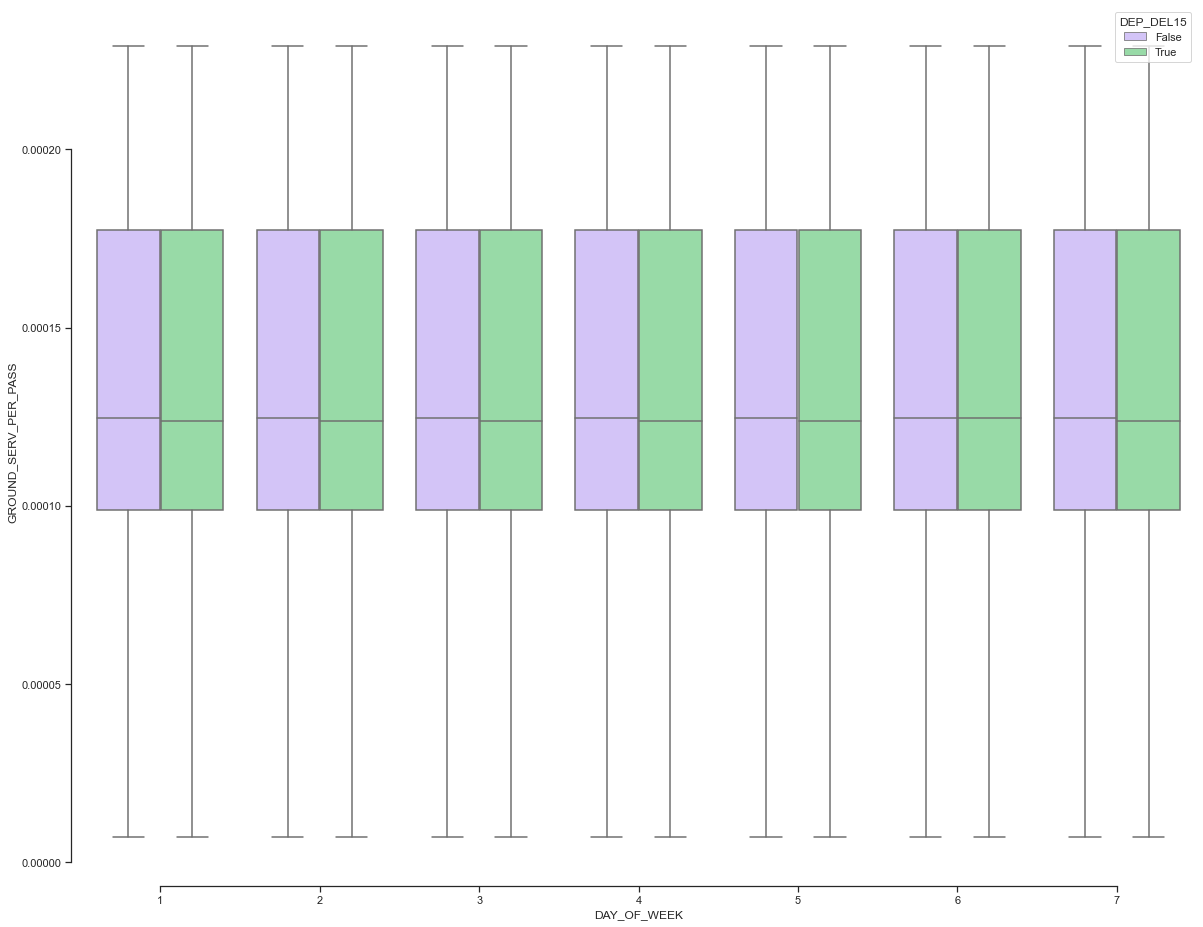

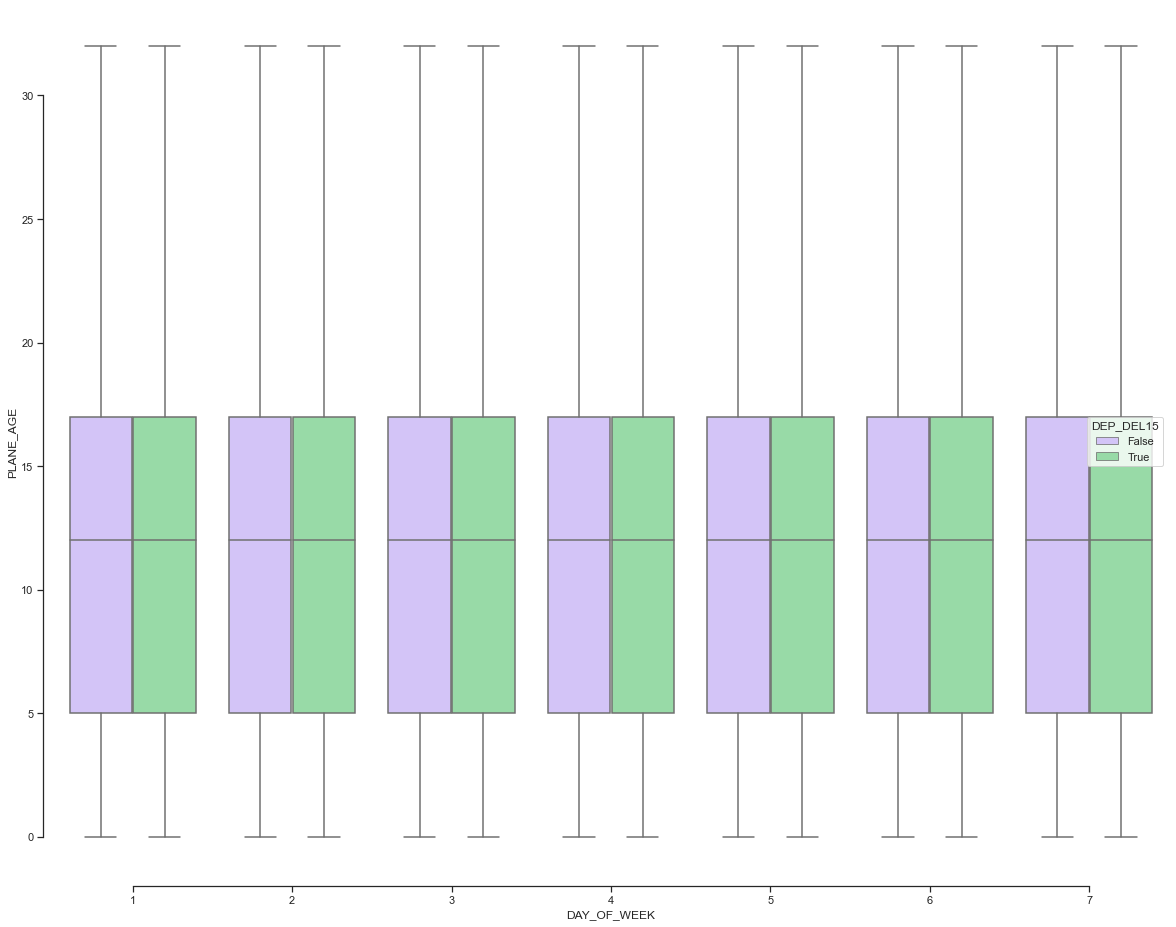

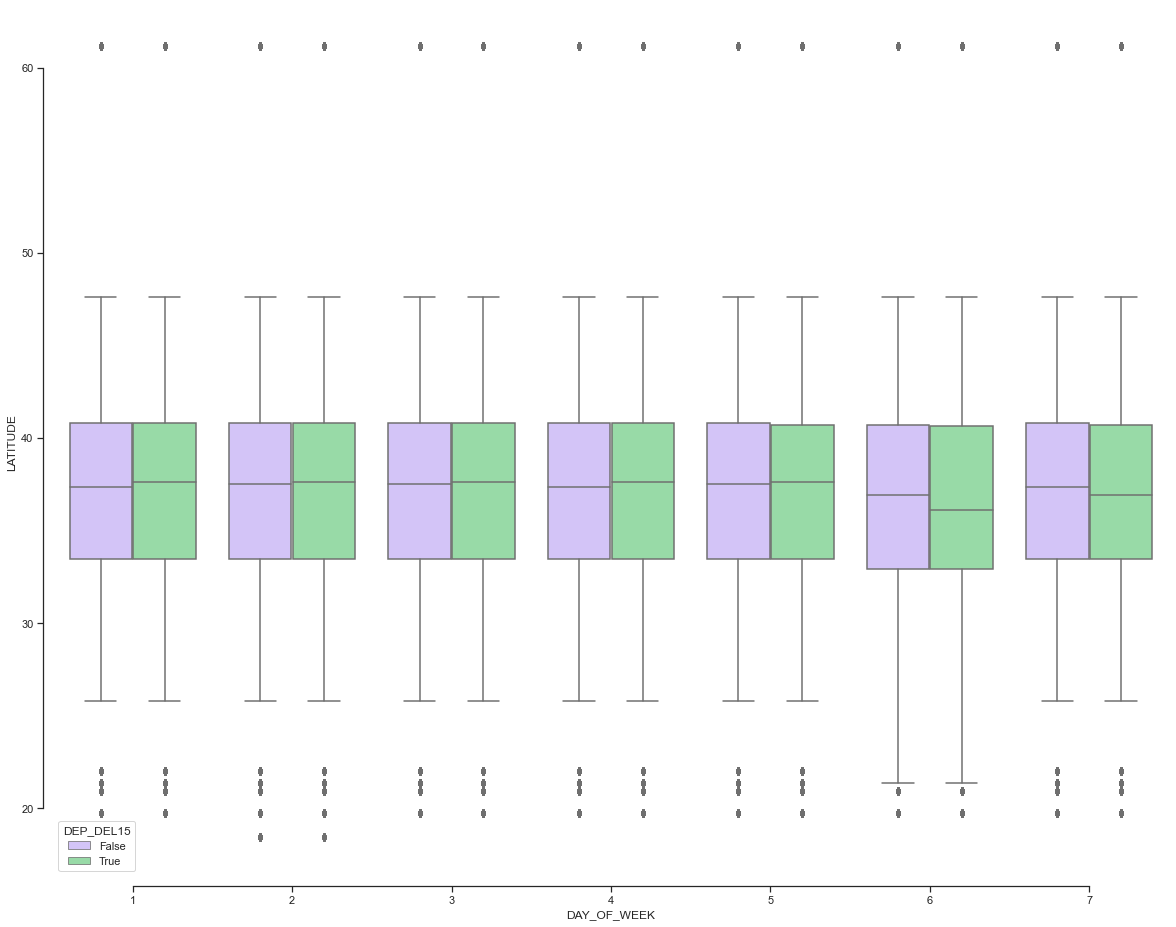

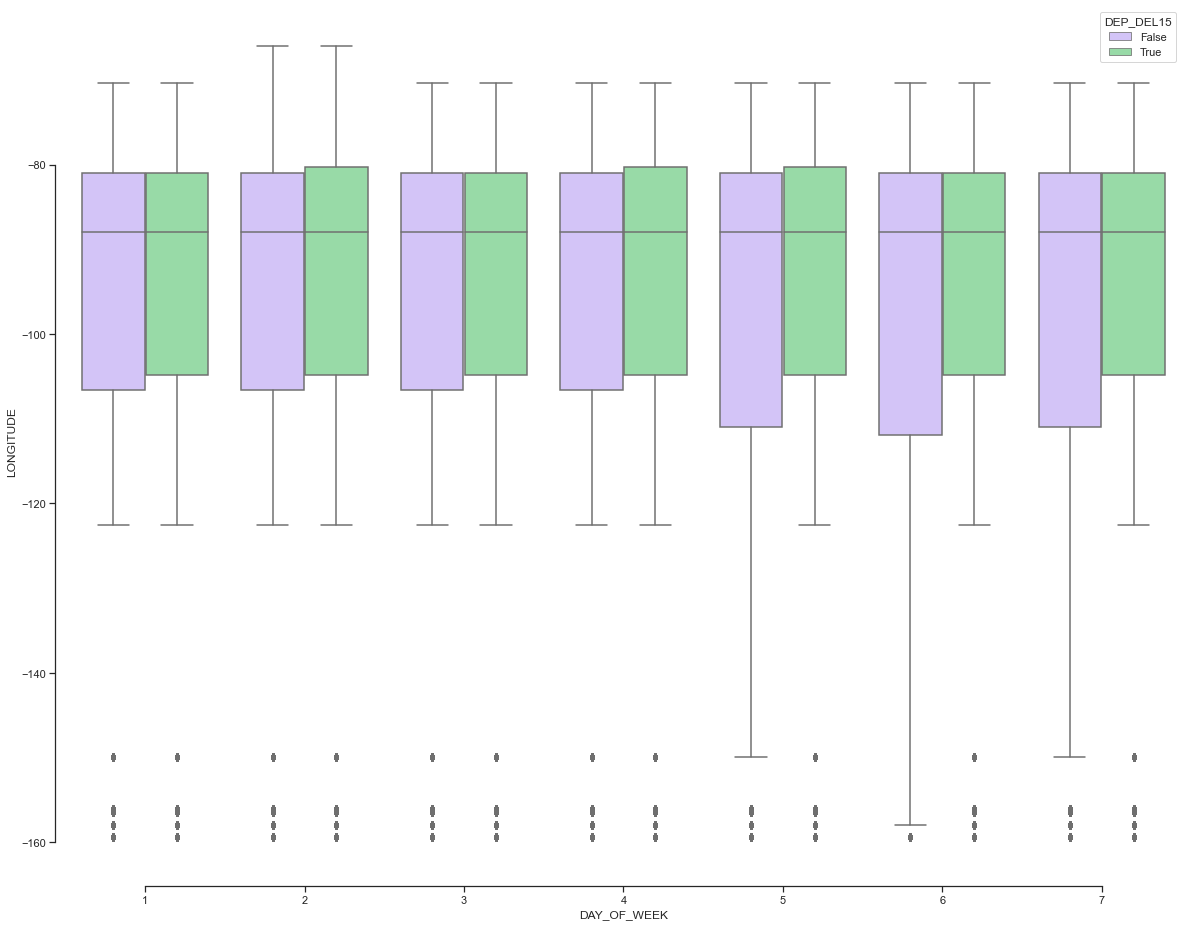

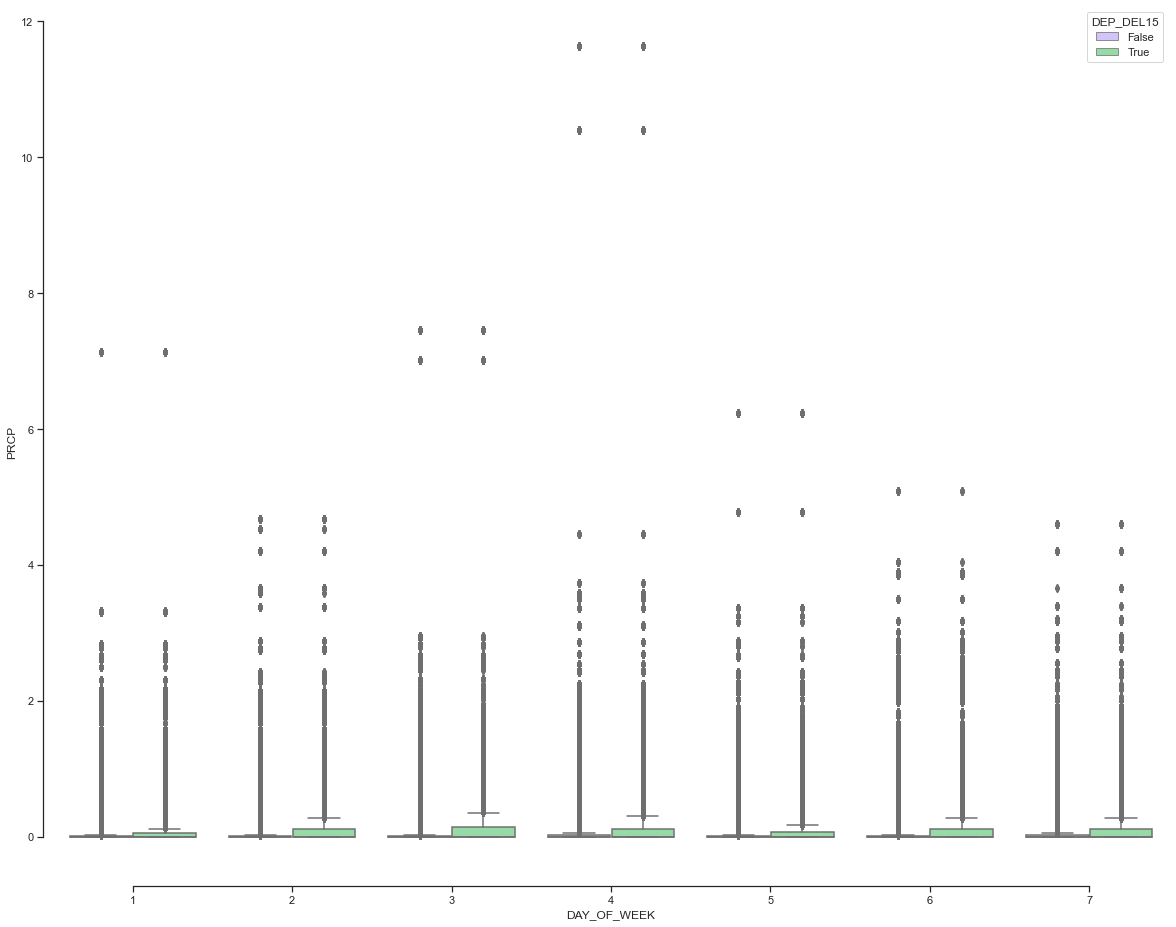

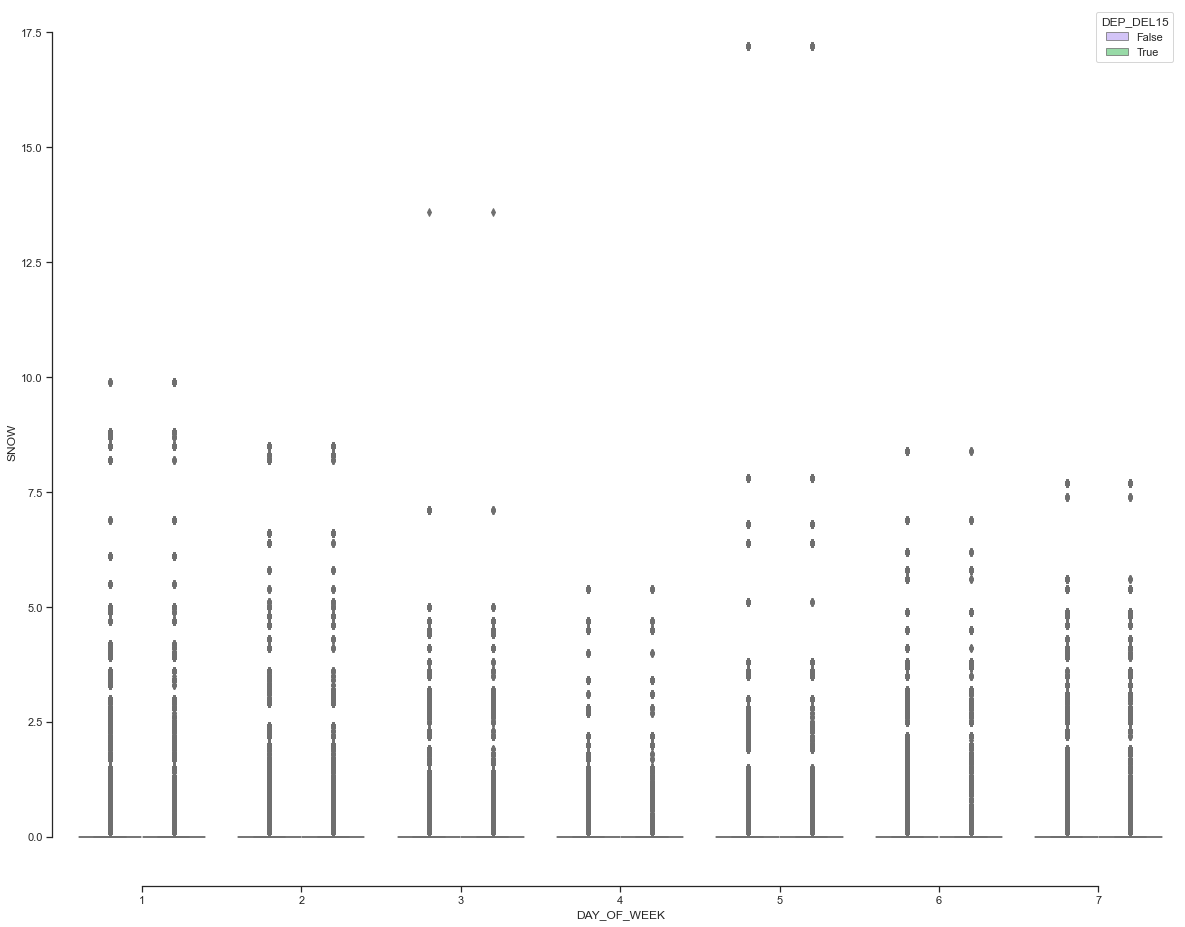

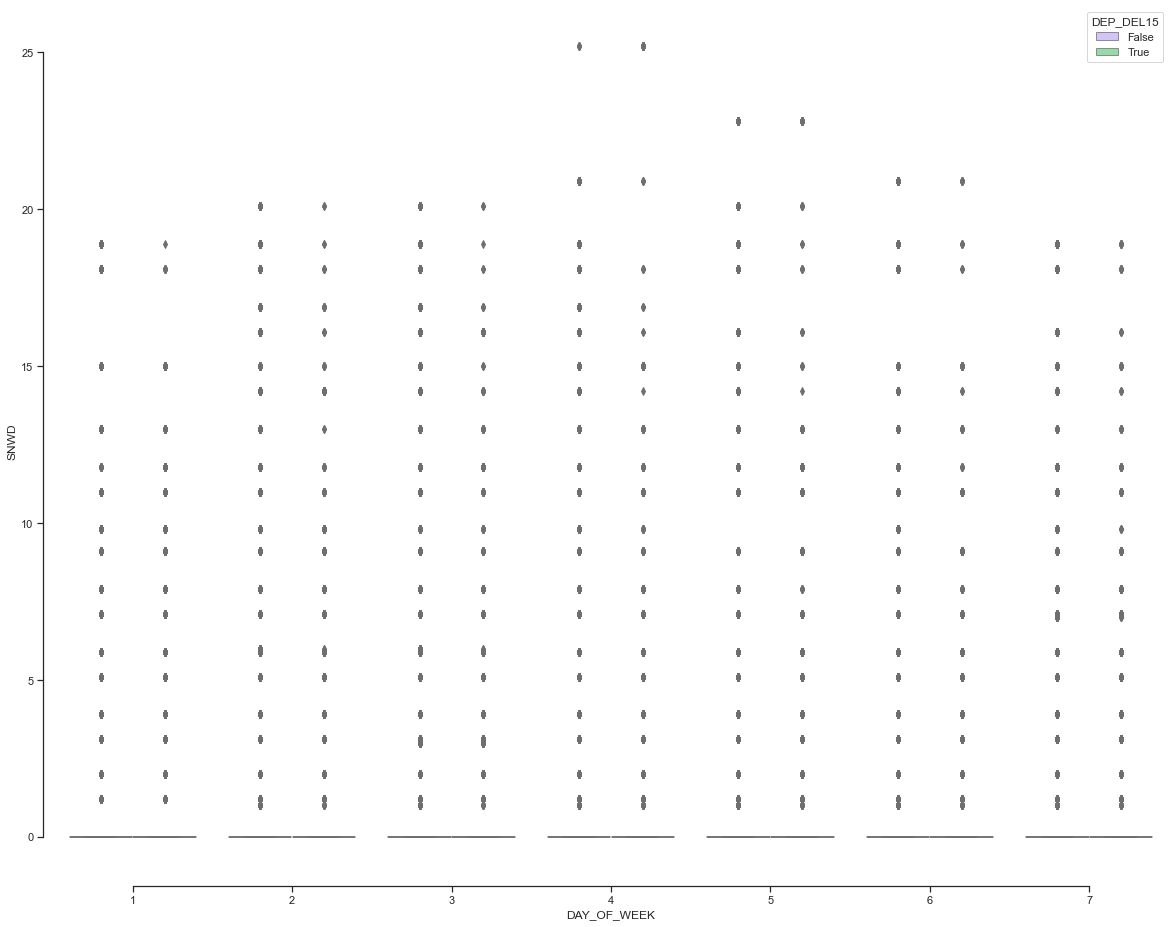

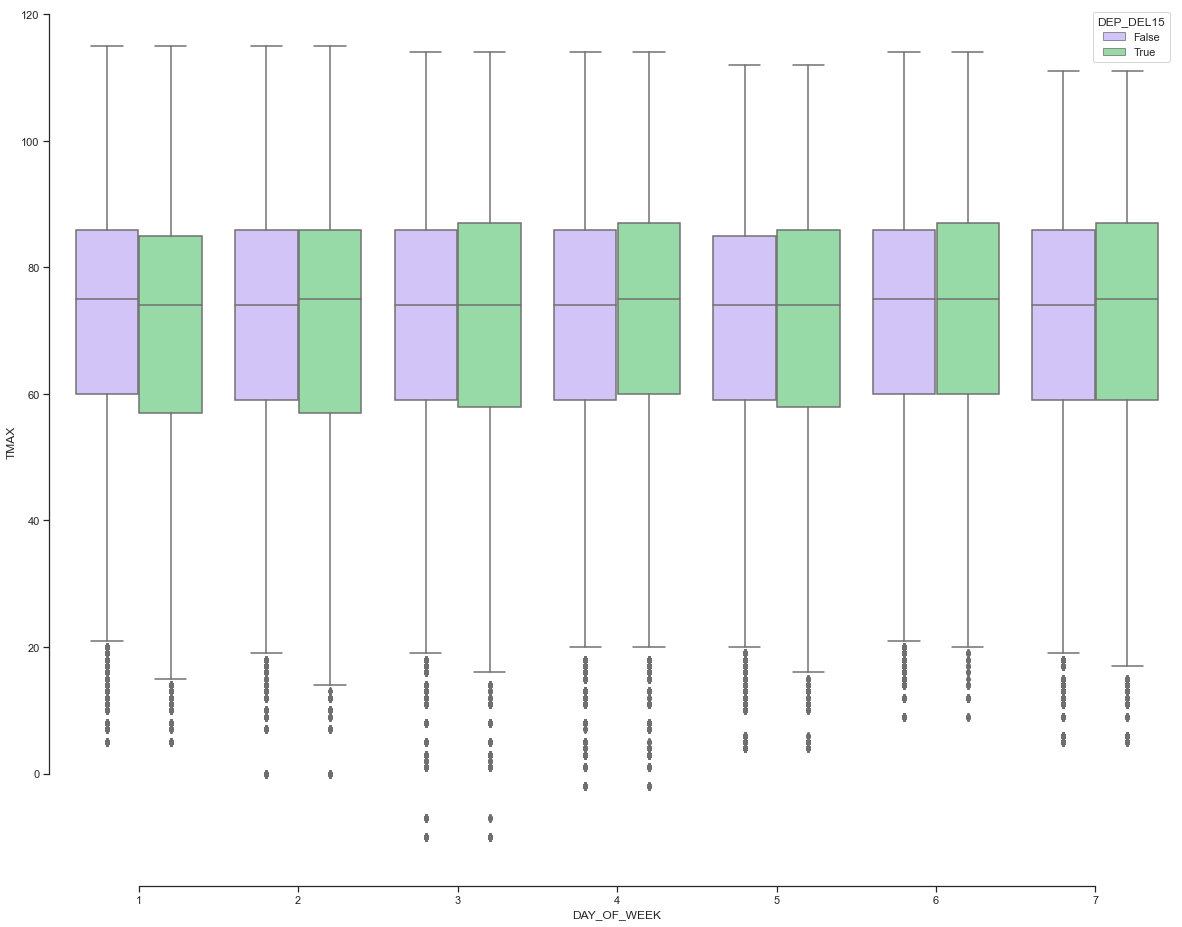

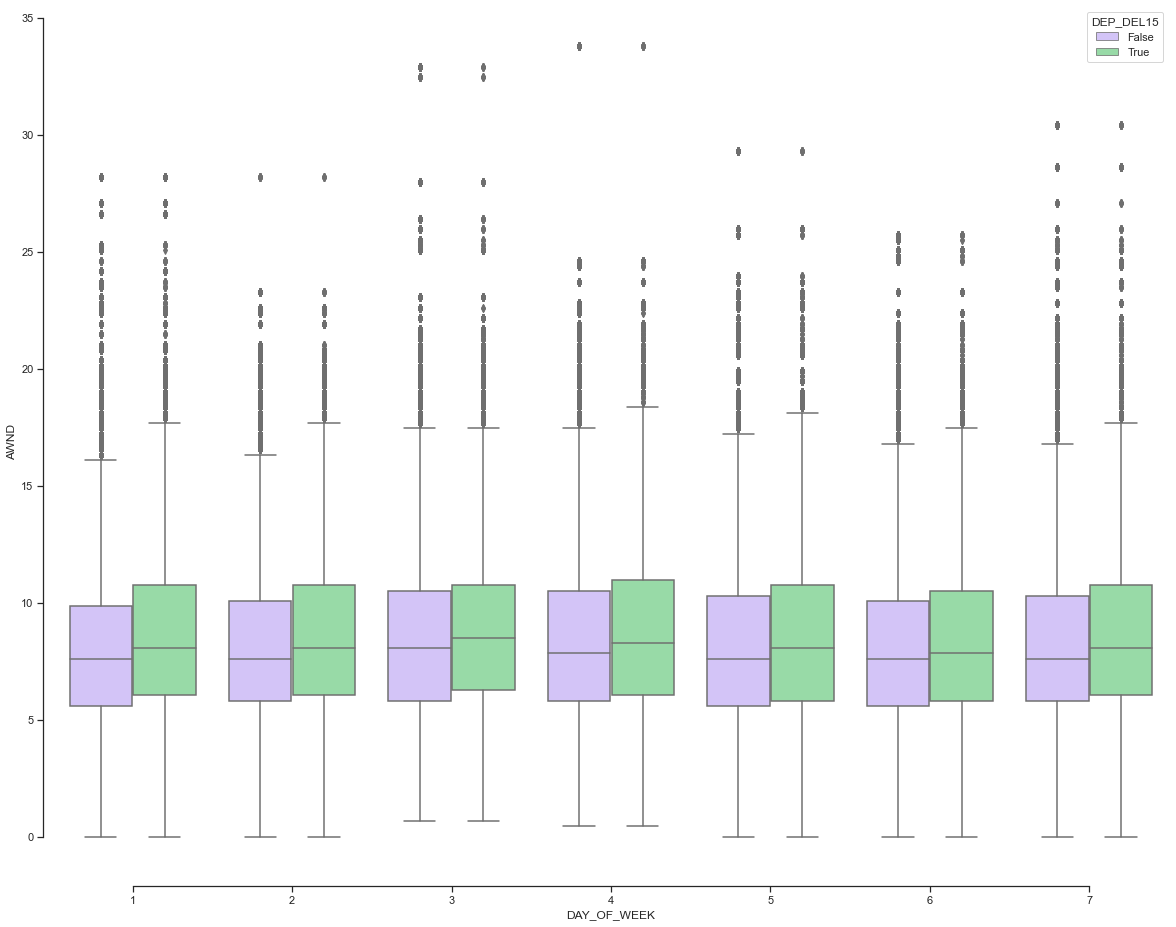

In [20]:
for feature in df.select_dtypes('number'):
    if (feature == 'DAY_OF_WEEK') | (feature == 'MONTH'):
        continue
    plt.figure(figsize = (20, 16))

    sns.boxplot(x="DAY_OF_WEEK", y=feature,
                hue="DEP_DEL15", palette=["m", "g"],
                data=df)
    sns.despine(offset=10, trim=True)

# Insights data por día

Variables notables:

- SEGMENT_NUMBER: Se denota un comportamiento idéntico de los datos para todos los días exceptuando los sábados, donde los vuelos sin retraso presentan mayor dispersión y menor mediana. Asimismo los vuelos con retraso parecen concentrarse más entre 2 y 4.

- AVG_MONTHLY_PASS_AIRPORT: Durante los fines de semana se observa una mayor dispersión en el número de pasajeros en vuelos con retraso.

- Pulgadas de nieve y precipitación: Altamente imbalanceados, lo que repercute en boxplots poco útiles. 

Resto de variables: Comportamientos idénticos por día, sin grandes diferencias por mencionar.

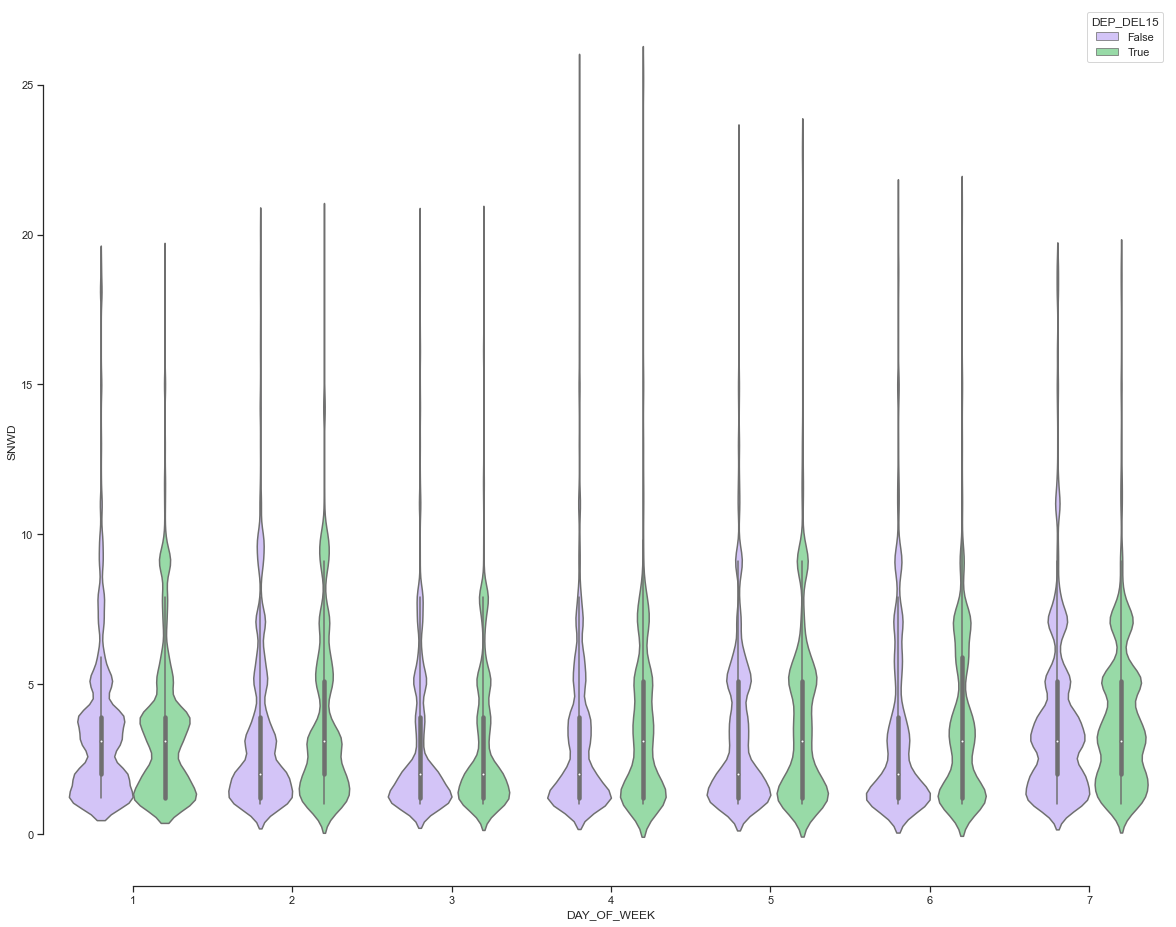

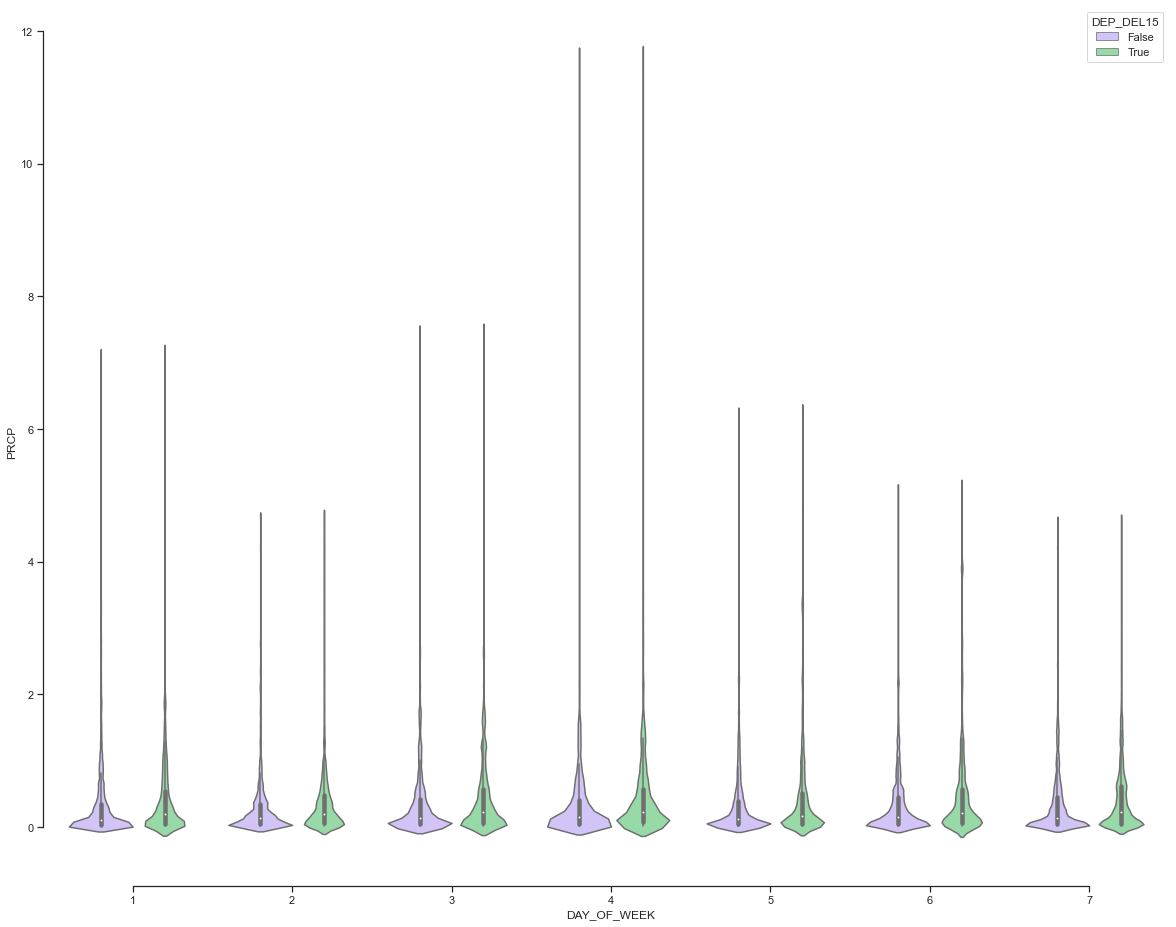

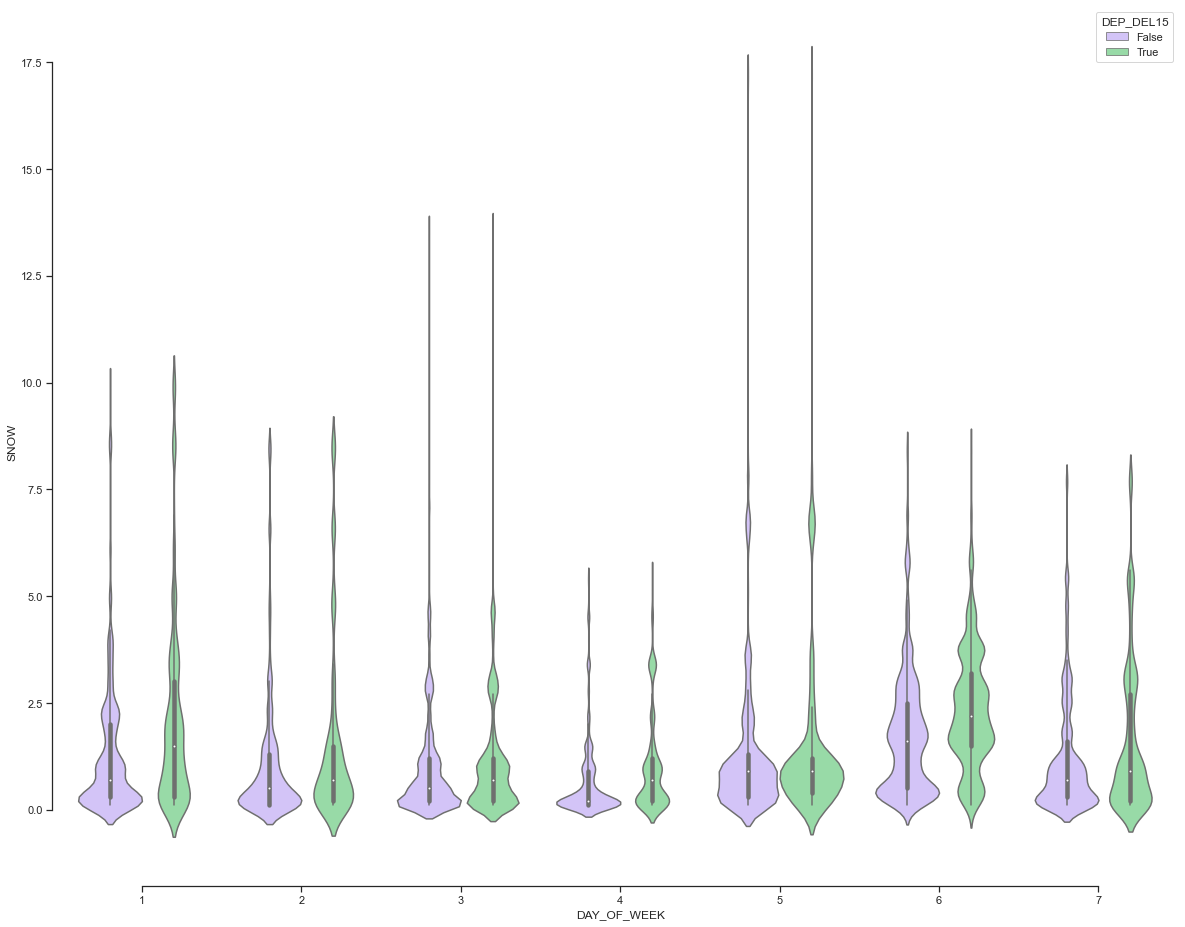

In [39]:
for feature in ['SNWD', 'PRCP', 'SNOW']:

    query = {
        'SNWD' : "SNWD > 0",
        'PRCP' : "PRCP > 0",
        'SNOW' : "SNOW > 0"
    }
    plt.figure(figsize = (20, 16))

    sns.violinplot(x="DAY_OF_WEEK", y=feature,
                hue="DEP_DEL15", palette=["m", "g"],
                data=df.query(query[feature]))
    sns.despine(offset=10, trim=True)

No parece haber gran relevancia en las diferentes medias en las variables graficadas sobre la variable objetivo.

# Variables categóricas

In [40]:
df.select_dtypes('category')

,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,PREVIOUS_AIRPORT
0,0800-0859,Southwest Airlines Co.,McCarran International,NONE
1,0700-0759,Delta Air Lines Inc.,McCarran International,NONE
2,0600-0659,Delta Air Lines Inc.,McCarran International,NONE
3,0600-0659,Delta Air Lines Inc.,McCarran International,NONE
4,0001-0559,Spirit Air Lines,McCarran International,NONE
...,...,...,...,...
6489057,2300-2359,Hawaiian Airlines Inc.,Lihue Airport,Honolulu International
6489058,1800-1859,Hawaiian Airlines Inc.,Lihue Airport,Honolulu International
6489059,2000-2059,Hawaiian Airlines Inc.,Lihue Airport,Honolulu International
6489060,2100-2159,Hawaiian Airlines Inc.,Lihue Airport,Honolulu International


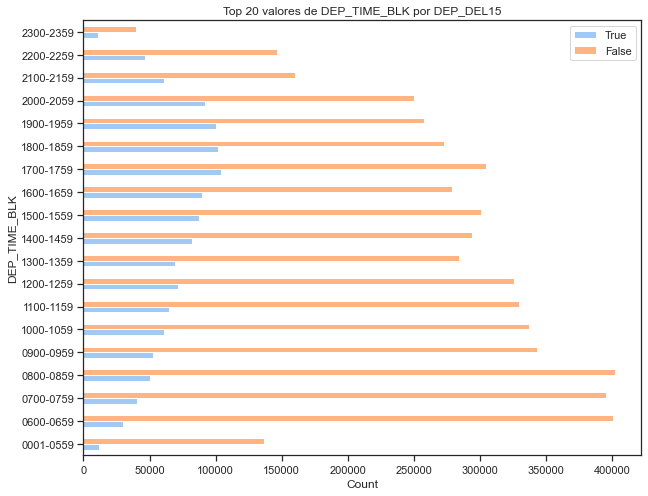

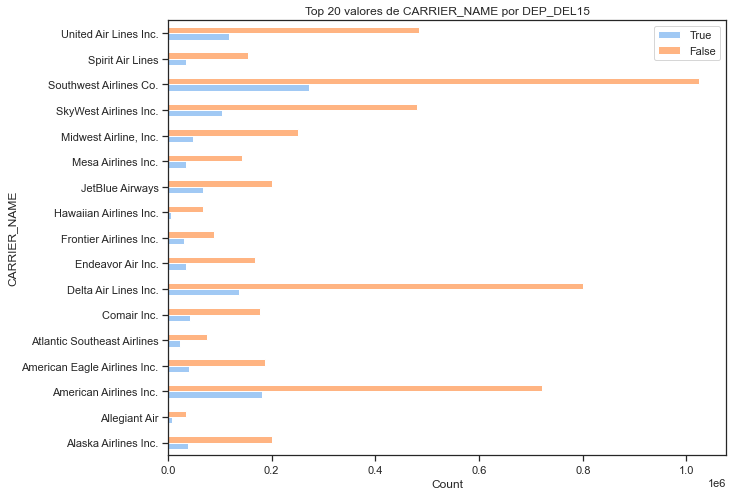

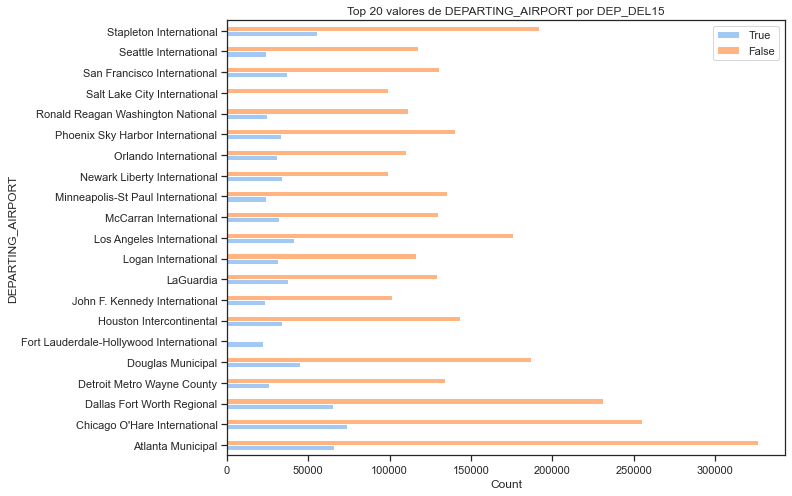

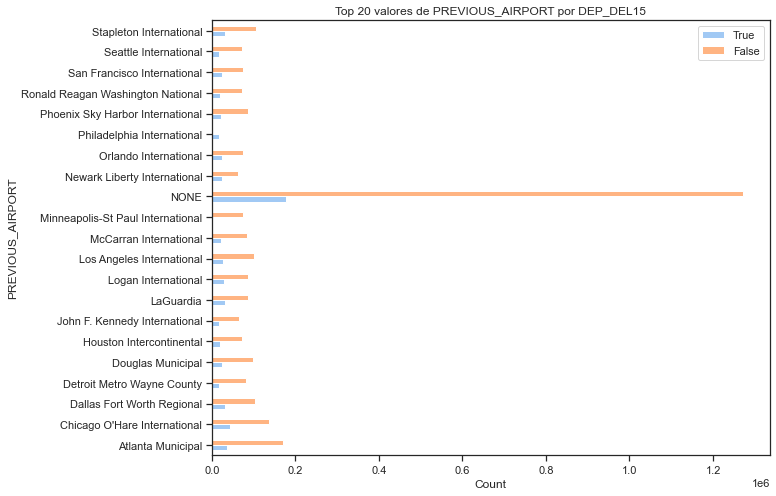

In [5]:
def plot_top_20_bars(df, columns, boolean_column):
    for col in columns:
        # Contar valores y separar por booleano
        count_true  = df[df[boolean_column] == True ][col].value_counts().nlargest(20)
        count_false = df[df[boolean_column] == False][col].value_counts().nlargest(20)
        
        # Crear un dataframe combinando los conteos
        counts_df = pd.DataFrame({
            'True': count_true,
            'False': count_false
        }).fillna(0)  # Llenar con 0 los valores faltantes

        # Plot
        counts_df.plot(kind='barh', figsize=(10, 8))
        plt.title(f'Top 20 valores de {col} por {boolean_column}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

# Llamar a la función con tus columnas categóricas y la columna booleana

plot_top_20_bars(df, df.select_dtypes('category').columns, 'DEP_DEL15')


Se denota una proporcionalidad similar columna a columna en los diferentes gráficos de barras. Resulta interesante observar que en el gráfico de PREVIOUS_AIRPORT el valor NONE es el más repetido por mucho. 